In [1]:
import sys, os
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from components.dataset import OcrDataset # OCR용 데이터셋
from torch.utils.data import DataLoader # 멀티배치 학습을 위한 데이터로더
from components.tokenizer import Tokenizer
from components.trainer import Trainer
from components.model import Model

import torch.optim as optim
import torch.nn as nn

In [2]:
base_dir = '../soma/font/dataset/'
train_dir = base_dir + 'train/'
val_dir = base_dir + 'val/'

In [3]:
train_ocr = OcrDataset(train_dir, is_val=False)
train_dataset = DataLoader(train_ocr, batch_size=32, shuffle=True)

val_ocr = OcrDataset(val_dir, is_val=True)
val_dataset = DataLoader(val_ocr, batch_size=32, shuffle=True)

In [4]:
tokenizer = Tokenizer(seq_len=10, one_hot=False)
model = Model(tokenizer)
PAD_IDX = tokenizer.word2id['<PAD>']
criterion = nn.CrossEntropyLoss(ignore_index = PAD_IDX)
optimizer = optim.Adam # 클래스 정보만 넘겨줌

In [5]:
trainer = Trainer(model, train_dataset, val_dataset, criterion, optimizer, tokenizer )

trainer

model: Model(
  (encoder): Encoder(
    (conv1): Conv2d(1, 64, kernel_size=(4, 4), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (drop1): Dropout(p=0.5, inplace=False)
    (conv2): Conv2d(64, 16, kernel_size=(4, 4), stride=(1, 1))
    (drop2): Dropout(p=0.5, inplace=False)
    (fc): Linear(in_features=1760, out_features=128, bias=True)
  )
  (decoder): Decoder(
    (embedding): Embedding(1017, 256)
    (dropout): Dropout(p=0.5, inplace=False)
    (rnn): GRU(256, 128)
    (fc_out): Linear(in_features=128, out_features=1017, bias=True)
  )
)
criterion: CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

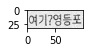

In [12]:
for x, y in train_dataset:
    plt.figure(figsize=(1,1))
    plt.imshow(x[0].squeeze(0), cmap="gray")
    plt.show()
    break